In [46]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from pylab import *

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [27]:
# Find the most recent date in the data set.
newest_record = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(newest_record)

('2017-08-23',)


In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
query_date = dt.date(2017,8,23) - dt.timedelta(days=365)
#print("Query Date :", query_date)

# Perform a query to retrieve the data and precipitation scores
data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= query_date).all()
for x in data:
    print(x)

('2016-08-23', 0.0)
('2016-08-24', 0.08)
('2016-08-25', 0.08)
('2016-08-26', 0.0)
('2016-08-27', 0.0)
('2016-08-28', 0.01)
('2016-08-29', 0.0)
('2016-08-30', 0.0)
('2016-08-31', 0.13)
('2016-09-01', 0.0)
('2016-09-02', 0.0)
('2016-09-03', 0.0)
('2016-09-04', 0.03)
('2016-09-05', None)
('2016-09-06', None)
('2016-09-07', 0.05)
('2016-09-08', 0.0)
('2016-09-09', 0.03)
('2016-09-10', 0.0)
('2016-09-11', 0.05)
('2016-09-12', 0.0)
('2016-09-13', 0.02)
('2016-09-14', 1.32)
('2016-09-15', 0.42)
('2016-09-16', 0.06)
('2016-09-17', 0.05)
('2016-09-18', 0.0)
('2016-09-19', 0.0)
('2016-09-20', 0.0)
('2016-09-21', 0.0)
('2016-09-22', 0.02)
('2016-09-23', 0.0)
('2016-09-24', 0.0)
('2016-09-25', 0.0)
('2016-09-26', 0.06)
('2016-09-27', 0.02)
('2016-09-28', 0.0)
('2016-09-29', 0.0)
('2016-09-30', 0.0)
('2016-10-01', 0.0)
('2016-10-02', 0.0)
('2016-10-03', 0.0)
('2016-10-04', 0.0)
('2016-10-05', 0.0)
('2016-10-06', 0.0)
('2016-10-07', 0.0)
('2016-10-08', 0.0)
('2016-10-09', 0.0)
('2016-10-10', 0.0)
('

('2017-07-08', 0.0)
('2017-07-09', 0.11)
('2017-07-10', 0.02)
('2017-07-11', 0.02)
('2017-07-12', 0.28)
('2017-07-13', 0.32)
('2017-07-14', 0.2)
('2017-07-15', 0.05)
('2017-07-16', 0.1)
('2017-07-17', 0.21)
('2017-07-18', 0.05)
('2017-07-19', 0.05)
('2017-07-20', 0.06)
('2017-07-21', 0.03)
('2017-07-22', 0.2)
('2017-07-23', 0.2)
('2017-07-24', 0.61)
('2017-07-25', 0.11)
('2017-07-26', 0.12)
('2017-07-27', 0.01)
('2017-07-28', 0.09)
('2017-07-29', 0.23)
('2017-07-30', 0.0)
('2017-07-31', 0.0)
('2017-08-04', 0.0)
('2017-08-05', 0.06)
('2017-08-06', 0.0)
('2017-08-13', 0.0)
('2017-08-14', 0.0)
('2017-08-15', 0.32)
('2017-08-16', 0.12)
('2017-08-17', 0.01)
('2017-08-18', 0.06)
('2016-08-23', 0.7)
('2016-08-24', 1.45)
('2016-08-25', 0.11)
('2016-08-27', None)
('2016-08-28', 2.07)
('2016-08-29', 0.9)
('2016-08-30', 0.05)
('2016-08-31', 2.46)
('2016-09-01', 0.01)
('2016-09-02', 0.03)
('2016-09-03', 1.0)
('2016-09-04', 0.44)
('2016-09-05', 0.18)
('2016-09-06', 1.0)
('2016-09-07', 1.35)
('2016-

In [16]:
# Save the query results as a Pandas DataFrame and set the index to the date column and remove any null values
climate_df = pd.DataFrame(data, columns = ["Date", "Precipitation"]).dropna(how='any')
climate_df.set_index("Date", inplace=True)

# Sort the dataframe by date
climate_df = climate_df.sort_values(["Date"])

# Show dataframe
climate_df.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.02
2016-08-23,0.05
2016-08-23,0.70
2016-08-23,0.15


In [42]:
# find the oldest date and restate the newest date (for the following plot)

newest_record 
oldest_record = session.query(Measurement.date).order_by(Measurement.date).first()

print(f"Newest record: {newest_record[0]}, Oldest record: {oldest_record[0]}")

Newest record: 2017-08-23, Oldest record: 2010-01-01


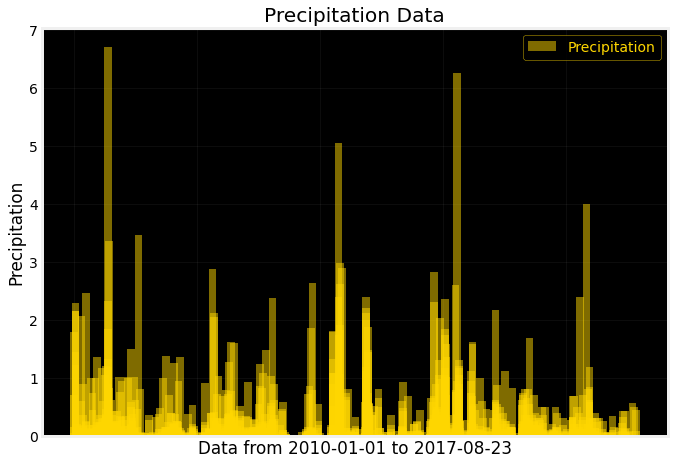

In [122]:
# Use Pandas Plotting with Matplotlib to plot the data

# YES I probably spent way too much time on this graph and made it too fancy... but I like graphs :)

# Create x and y variables
x = climate_df.index.tolist()
y = climate_df["Precipitation"].tolist()

# Create figure and its specifications
fig, ax = plt.subplots(figsize = (10,7), facecolor = 'white')

ax.bar(x, y, width = 5, color = 'gold', alpha = 0.5, align = 'center', label = 'Precipitation')
ax.tick_params(
    axis = 'x',          # changes apply to the x-axis
    which = 'both',      # both major and minor ticks are affected
    bottom = False,      # ticks along the bottom edge are off
    top = False,         # ticks along the top edge are off
    labelbottom = False) # labels along the bottom edge are off
major_ticks = np.arange(0,400,80)
ax.set_xticks(major_ticks)
ax.set_facecolor('black')

# Set plot title and labels, turn on grid and legend, and show the plot
ax.set_title("Precipitation Data")
ax.set_xlabel(f"Data from {oldest_record[0]} to {newest_record[0]}")
ax.set_ylabel("Precipitation")
ax.grid(b = True, linewidth = 1, alpha = 0.05, color = 'white')
ax.legend(labelcolor = 'gold', facecolor = 'black', edgecolor = 'gold')
plt.show()

In [119]:
# Use Pandas to calcualte the summary statistics for the precipitation data
climate_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [120]:
# Design a query to calculate the total number stations in the dataset
session.query(Station.id).count()

9

In [124]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
sel = [Measurement.station, func.count(Measurement.id)]

active_stations = session.query(*sel).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.id).desc()).all()

active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [127]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

sel = [Measurement.station,
       func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)]

most_active_data = session.query(*sel).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.id).desc()).first()

most_active_data

('USC00519281', 54.0, 85.0, 71.66378066378067)

In [144]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Convert the newest_record to date/time format and find the oldest also 
newest_date = dt.datetime.strptime(newest_record[0], '%Y-%m-%d')
oldest_date = newest_date - dt.timedelta(days=365)

# Query
query_result = session.query(Measurement.tobs).\
    filter(Measurement.station == active_stations[0][0]).\
    filter(Measurement.date >= oldest_date).all()

# Create list of temperatures from query
temperatures = list(np.ravel(query_result))

# Select statement
sel = [Station.station,
       Station.name,
       Station.latitude,
       Station.longitude,
       Station.elevation]

query_result = session.query(*sel).all()

In [149]:
# Create dataframe from station trailing twelve-month data
stations = pd.DataFrame(query_result, columns = ['Station', 'Name', 'Latitude', 'Longitude','Elevation'])

# Find the station name
station_name = stations.loc[stations["Station"] == active_stations[0][0], "Name"].tolist()[0]

stations

,Station,Name,Latitude,Longitude,Elevation
0,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


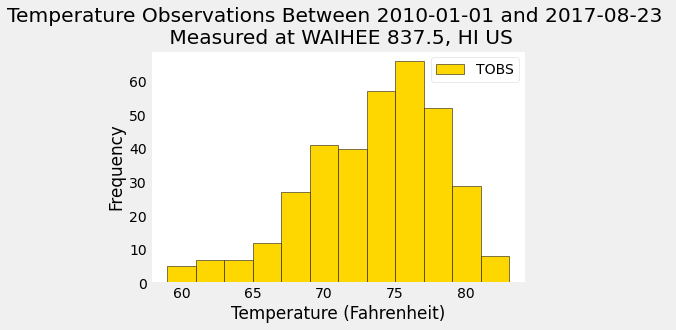

In [155]:
# Create histogram from temperature data
plt.hist(temperatures, bins = 12, rwidth = 1.0, facecolor = 'gold', edgecolor = 'black', label = "TOBS")
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel("Frequency")
plt.title(f"Temperature Observations Between {oldest_record[0]} and {newest_record[0]} \n Measured at {station_name}")
plt.figsize = (10,7)
plt.grid()
plt.legend()
plt.show()

# Close session

In [156]:
# Close Session
session.close()